In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 3.1 Feature Normalization

In [2]:
def feature_normalization(train, test):
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.

    Args:
        train - training set, a 2D numpy array of size (num_instances, num_features)
        test - test set, a 2D numpy array of size (num_instances, num_features)

    Returns:
        train_normalized - training set after normalization
        test_normalized - test set after normalization
    """
    train = pd.DataFrame(train)
    test = pd.DataFrame(test)
    for col in train.columns:
        if train[col].nunique() != 1:
            min_col = min(train[col])
            dif_col = max(train[col])-min(train[col])
            train[col] = (train[col]-min(train[col]))/(max(train[col])-min(train[col]))
            test[col] = (test[col] - min_col)/dif_col
    return train,test

In [ ]:
# data = pd.read_csv('data.csv')
# data.head()

# X = data.drop('y',1)
# Y = data['y']

# X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.15)

In [ ]:
def main():
    #Loading the dataset
    print('loading the dataset')

    df = pd.read_csv('data.csv', delimiter=',')
    X = df.values[:,:-1]
    y = df.values[:,-1]

    print('Split into Train and Test')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =100, random_state=10)

    print("Scaling all to [0, 1]")
    X_train, X_test = feature_normalization(X_train, X_test)
    X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
    X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))  # Add bias term
    # TODO

# if __name__ == "__main__":
#     main()

In [3]:

    #Loading the dataset
print('loading the dataset')

df = pd.read_csv('data.csv', delimiter=',')
X = df.values[:,:-1]
y = df.values[:,-1]

print('Split into Train and Test')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =100, random_state=10)

print("Scaling all to [0, 1]")
X_train, X_test = feature_normalization(X_train, X_test)
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))  # Add bias term
# X_train = pd.DataFrame(X_train)
# X_test = pd.DataFrame(X_test)
# y_train = pd.DataFrame(y_train)
# y_test = pd.DataFrame(y_test)
    # TODO

# if __name__ == "__main__":
#     main()

loading the dataset
Split into Train and Test
Scaling all to [0, 1]


# 3.2 Gradient Descent Setup

In [4]:
def compute_square_loss(X, y, theta):
    """
    Given a set of X, y, theta, compute the average square loss for predicting y with X*theta.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D array of size (num_features)

    Returns:
        loss - the average square loss, scalar
    """
    loss = 0 #Initialize the average square loss
    m = X.shape[0]
    diff = np.dot(X,theta)-y
    loss = 1/m*np.dot(diff,diff)
    return loss
    

In [5]:
def compute_square_loss_gradient(X, y, theta):
    """
    Compute the gradient of the average square loss (as defined in compute_square_loss), at the point theta.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)

    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    m = X.shape[0]
    diff = np.dot(X,theta)-y
    grad = 2/m*np.dot(diff,X)
    return grad

# 3.4 Batch Gradient Descent

In [6]:
def batch_grad_descent(X, y, alpha=0.1, num_step=1000, grad_check=False):
    """
    In this question you will implement batch gradient descent to
    minimize the average square loss objective.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        num_step - number of steps to run
        grad_check - a boolean value indicating whether checking the gradient when updating

    Returns:XXX
        theta_hist - the history of parameter vector, 2D numpy array of size (num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step (num_step) is theta_hist[-1]
        loss_hist - the history of average square loss on the data, 1D numpy array, (num_step+1)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    theta = np.zeros(num_features) #Initialize theta
    for i in range(num_step+1):
        if grad_check:
            if i ==0:
                #theta+= 1
                theta_hist[i] = theta
                loss_hist[i] = compute_square_loss(X, y, theta)
            else:
                gradient = compute_square_loss_gradient(X, y, theta)
                theta = theta - alpha*gradient.T
                theta_hist[i] = theta
                loss_hist[i] = compute_square_loss(X, y, theta)
    return theta_hist,loss_hist
        
            

In [7]:
theta001,loss001 = batch_grad_descent(X_train, y_train, alpha=0.01, num_step=1000, grad_check=True)
print(loss001)

[7.96151834 7.91242197 7.87772357 ... 2.78748976 2.78647298 2.78545842]


In [8]:
theta005,loss005 = batch_grad_descent(X_train, y_train, alpha=0.05, num_step=1000, grad_check=True)
print(loss005)

[7.96151834 7.82651953 7.70376849 ... 2.0780049  2.07785195 2.07769937]


In [9]:
theta01,loss01 = batch_grad_descent(X_train, y_train, alpha=0.1, num_step=1000, grad_check=True)
print(loss01)

[ 7.96151834  7.96772837 10.08387334 ...         nan         nan
         nan]


In [10]:
theta05,loss05 = batch_grad_descent(X_train, y_train, alpha=0.5, num_step=1000, grad_check=True)
print(loss05)

[   7.96151834   19.04087477 4294.50999069 ...           nan           nan
           nan]


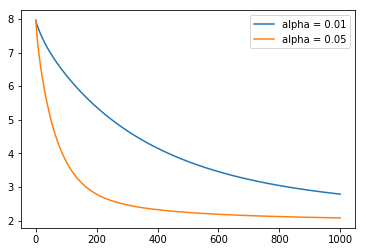

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(len(loss001)),loss001,label = "alpha = 0.01")
plt.plot(range(len(loss005)),loss005,label = "alpha = 0.05")
plt.legend()

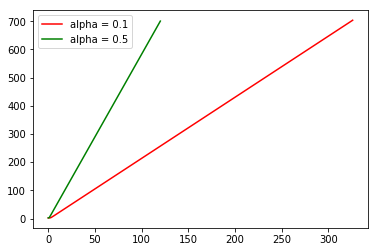

In [12]:
plt.plot(range(len(loss01)),np.log(loss01),label = "alpha = 0.1",color = 'r')
plt.plot(range(len(loss05)),np.log(loss05),label = "alpha = 0.5",color = 'g')
plt.legend()

Findings: when step sizes get larger, average square loss decreases faster. When the step size is large to some degree, the step size is too large for the given dataset and the gradient diverges. Here in this case, when alpha=0.1, the gradient diverges. 

# 3.5 Ridge Regression

In [13]:
def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
    """
    Compute the gradient of L2-regularized average square loss function given X, y and theta

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        lambda_reg - the regularization coefficient

    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    ori_grad = compute_square_loss_gradient(X, y, theta)
    grad = ori_grad + 2*lambda_reg*theta
    return grad

In [14]:
def regularized_grad_descent(X, y, alpha=0.05, lambda_reg=10**-2, num_step=1000):
    """
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        lambda_reg - the regularization coefficient
        num_step - number of steps to run
    
    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size (num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step (num_step+1) is theta_hist[-1]
        loss hist - the history of average square loss function without the regularization term, 1D numpy array.
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.zeros(num_features) #Initialize theta
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    for i in range(num_step+1):
        if i ==0:
            #theta+= 1
            theta_hist[i] = theta
            loss_hist[i] = compute_square_loss(X, y, theta)
        else:
            gradient = compute_regularized_square_loss_gradient(X, y, theta, lambda_reg)
            theta = theta - alpha*gradient.T
            theta_hist[i] = theta
            loss_hist[i] = compute_square_loss(X, y, theta)
    return theta_hist,loss_hist

2.0776994945532925
2.077700614426301
2.077711814283324
2.077823925495229
2.0789562494384244
2.0913500007595975
2.2847146705114056
4.245811582850459


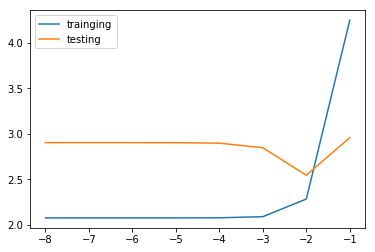

In [15]:
loss_list = []
loss_test_list = []
lambda_reg1 = [-8,-7,-6,-5,-4,-3,-2,-1]
for lambda_reg in [-8,-7,-6,-5,-4,-3,-2,-1]:
    theta_reg,loss_reg = regularized_grad_descent(X_train, y_train, alpha=0.05, lambda_reg=10**lambda_reg, num_step=1000)
    loss_list.append(loss_reg[-1])
    loss_test = compute_square_loss(X_test,y_test,theta_reg[-1])
    loss_test_list.append(loss_test)
    print(loss_reg[-1])
#     plt.scatter(lambda_reg,loss_reg[-1])
plt.plot(lambda_reg1,loss_list,label = 'trainging')
plt.plot(lambda_reg1,loss_test_list,label = 'testing')
plt.legend()

In [ ]:
# for lambda_reg in [-7,-5,-3,-1,0,1,2]:
#     theta_reg,loss_reg = regularized_grad_descent(X_train, y_train, alpha=0.05, lambda_reg=10**lambda_reg, num_step=10)
#     print(loss_reg)
#     plt.plot(range(len(loss_reg)),np.log(loss_reg),label = "lambda = %0.7f"%(10**lambda_reg))
# plt.legend()

In [ ]:
# for lambda_reg in [-7,-5,-3,-1,0]:
#     theta_reg,loss_reg = regularized_grad_descent(X_train, y_train, alpha=0.05, lambda_reg=10**lambda_reg, num_step=10)
#     print(loss_reg)
#     plt.plot(range(len(loss_reg)),np.log(loss_reg),label = "lambda = %0.7f"%(10**lambda_reg))
# plt.legend()

In [ ]:

# theta_reg_7,loss_reg_7 = regularized_grad_descent(X_train, y_train, alpha=0.05, lambda_reg=10**(-7), num_step=1000)
# print(loss_reg_7)

In [ ]:
# theta_reg_5,loss_reg_5 = regularized_grad_descent(X_train, y_train, alpha=0.05, lambda_reg=10**(-5), num_step=1000)
# print(loss_reg_5)

In [ ]:
# theta_reg_3,loss_reg_3 = regularized_grad_descent(X_train, y_train, alpha=0.05, lambda_reg=10**(-3), num_step=1000)
# print(loss_reg_3)

In [ ]:
# theta_reg_1,loss_reg_1 = regularized_grad_descent(X_train, y_train, alpha=0.05, lambda_reg=10**(-1), num_step=1000)
# print(loss_reg_1)

In [ ]:
# theta_reg_0,loss_reg_0 = regularized_grad_descent(X_train, y_train, alpha=0.05, lambda_reg=10**(-0), num_step=1000)
# print(loss_reg_0)

In [ ]:
# plt.plot(range(len(loss_reg_7)),np.log(loss_reg_7),label = "lambda = 10**(-7)")
# plt.plot(range(len(loss_reg_5)),np.log(loss_reg_5),label = "lambda = 10**(-5)")
# plt.plot(range(len(loss_reg_3)),np.log(loss_reg_3),label = "lambda = 10**(-3)")
# plt.plot(range(len(loss_reg_1)),np.log(loss_reg_1),label = "lambda = 10**(-1)")
# plt.plot(range(len(loss_reg_0)),np.log(loss_reg_0),label = "lambda = 1")
# plt.legend()

In [ ]:
# plt.plot(range(len(loss_reg_7)),np.log(loss_test_7),label = "lambda = 10**(-7)")
# plt.plot(range(len(loss_reg_5)),np.log(loss_test_5),label = "lambda = 10**(-5)")
# plt.plot(range(len(loss_reg_3)),np.log(loss_test_3),label = "lambda = 10**(-3)")
# plt.plot(range(len(loss_reg_1)),np.log(loss_test_1),label = "lambda = 10**(-1)")
# plt.plot(range(len(loss_reg_0)),np.log(loss_test_0),label = "lambda = 1")
# plt.legend()

In [ ]:
# plt.plot(np.log(range(len(loss_reg_7))),np.log(loss_test_7),label = "lambda = 10**(-7)")
# plt.plot(np.log(range(len(loss_reg_5))),np.log(loss_test_5),label = "lambda = 10**(-5)")
# plt.plot(np.log(range(len(loss_reg_3))),np.log(loss_test_3),label = "lambda = 10**(-3)")
# plt.plot(np.log(range(len(loss_reg_1))),np.log(loss_test_1),label = "lambda = 10**(-1)")
# plt.plot(np.log(range(len(loss_reg_0))),np.log(loss_test_0),label = "lambda = 1")
# plt.legend()

I will choose 10**(-2) because the loss on test set is also the smallest

# 3.6 Stochastic Gradient Descent

In [28]:
from random import shuffle
def stochastic_grad_descent(X, y, alpha=0.01, lambda_reg=10**-2, num_epoch=1000,c = 0.1):
    """
    In this question you will implement stochastic gradient descent with regularization term

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - string or float, step size in gradient descent
                NOTE: In SGD, it's not a good idea to use a fixed step size. Usually it's set to 1/sqrt(t) or 1/t
                if alpha is a float, then the step size in every step is the float.
                if alpha == "1/sqrt(t)", alpha = 1/sqrt(t).
                if alpha == "1/t", alpha = 1/t.
        lambda_reg - the regularization coefficient
        num_epoch - number of epochs to go through the whole training set

    Returns:
        theta_hist - the history of parameter vector, 3D numpy array of size (num_epoch, num_instances, num_features)
                     for instance, theta in epoch 0 should be theta_hist[0], theta in epoch (num_epoch) is theta_hist[-1]
        loss hist - the history of loss function vector, 2D numpy array of size (num_epoch, num_instances)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta

    theta_hist = np.zeros((num_epoch, num_instances, num_features)) #Initialize theta_hist
    loss_hist = np.zeros((num_epoch, num_instances)) #Initialize loss_hist
    
    idx = np.arange(num_instances)
    shuffle(idx)
    X = X[idx]
    y = y[idx]
    
    for i in range(num_epoch):
#         if i ==0:
#             theta_hist[0][0]= i
#             theta_hist[0][1] = theta
#             loss_hist[0][0] = i
#             loss_hist[0][1] = compute_square_loss(X, y, theta)
#         else:
        for j in range(num_instances):
            if alpha == "1/sqrt(t)":
                alpha = c/np.sqrt(i*num_instance+j+1)
            elif alpha == "1/t":
                alpha = c/(i*num_instance+j+1)
        #randomly choose training point
            #x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.55)
            #x_train,x_test = feature_normalization(x_train,x_test)
        #calculation
            theta_hist[i][j] = theta
            
#             diff = np.dot(X[j],theta)-y[j]
#             loss_hist[i][j] = np.dot(diff,diff)+lambda_reg*np.dot(theta,theta)

            gradient = compute_regularized_square_loss_gradient(X[j], y[j], theta, lambda_reg)
#             theta = theta - alpha*2*(np.dot(diff,X[j])+lambda_reg*theta)
            loss_hist[i][j]= compute_square_loss(X, y, theta)+lambda_reg*np.dot(theta,theta)
            theta = theta - alpha*gradient.T
    return theta_hist,loss_hist

In [22]:
from random import shuffle
def stochastic_grad_descent(X, y, alpha=0.01, lambda_reg=10**-2, num_epoch=1000,c = 0.1):
    """
    In this question you will implement stochastic gradient descent with regularization term

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - string or float, step size in gradient descent
                NOTE: In SGD, it's not a good idea to use a fixed step size. Usually it's set to 1/sqrt(t) or 1/t
                if alpha is a float, then the step size in every step is the float.
                if alpha == "1/sqrt(t)", alpha = 1/sqrt(t).
                if alpha == "1/t", alpha = 1/t.
        lambda_reg - the regularization coefficient
        num_epoch - number of epochs to go through the whole training set

    Returns:
        theta_hist - the history of parameter vector, 3D numpy array of size (num_epoch, num_instances, num_features)
                     for instance, theta in epoch 0 should be theta_hist[0], theta in epoch (num_epoch) is theta_hist[-1]
        loss hist - the history of loss function vector, 2D numpy array of size (num_epoch, num_instances)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta

    theta_hist = np.zeros((num_epoch, num_instances, num_features)) #Initialize theta_hist
    loss_hist = np.zeros((num_epoch, num_instances)) #Initialize loss_hist
    
    idx = np.arange(num_instances)
    shuffle(idx)
    X = X[idx]
    y = y[idx]
    step_size =0
    for i in range(num_epoch):
        f_j=0
#         if i ==0:
#             theta_hist[0][0]= i
#             theta_hist[0][1] = theta
#             loss_hist[0][0] = i
#             loss_hist[0][1] = compute_square_loss(X, y, theta)
#         else:
        for j in range(num_instances):
            if alpha == "1/sqrt(t)":
                step_size = c/np.sqrt(i*num_instance+j+1)
            elif alpha == "1/t":
                step_size = c/(i*num_instance+j+1)
            else:
                step_size = alpha
        #randomly choose training point
            #x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.55)
            #x_train,x_test = feature_normalization(x_train,x_test)
        #calculation
            theta_hist[i][j] = theta
            
            diff = np.dot(X[j],theta)-y[j]
            f_j += np.dot(diff,diff)+lambda_reg*np.dot(theta,theta)
            loss_hist[i][j] = f_j
#             gradient = compute_regularized_square_loss_gradient(X[j], y[j], theta, lambda_reg)
            theta = theta - step_size*2*(np.dot(diff,X[j])+lambda_reg*theta)
#             loss_hist[i][j]= compute_square_loss(X[j], y[j], theta)+lambda_reg*np.dot(theta,theta)
#             theta = theta - alpha*gradient.T
    return theta_hist,loss_hist

Fixed steps:

[[883.35852205 863.75448914 806.24592715 ...   8.57718863   8.41142151
    8.48618156]
 [  8.3717635    8.37860081   8.33249128 ...   7.60977809   7.55801091
    7.57457254]
 [  7.55816914   7.55929816   7.54566487 ...   7.31252449   7.25507415
    7.27407361]
 ...
 [  6.49144883   6.48739224   6.45468971 ...   6.54137296   6.45151406
    6.48136906]
 [  6.49144883   6.48739224   6.45468971 ...   6.54137296   6.45151406
    6.48136906]
 [  6.49144883   6.48739224   6.45468971 ...   6.54137296   6.45151406
    6.48136906]]
[[883.35852205 876.7849229  871.1115245  ... 398.81305121 392.45625158
  389.86625852]
 [389.77283435 387.36151044 384.8959319  ... 178.85838578 175.8715627
  174.65230952]
 [174.61336246 173.86008397 172.78871052 ...  82.85419035  81.40963808
   80.81792245]
 ...
 [  6.42576197   6.4263051    6.42610146 ...   6.42728497   6.42610834
    6.42557831]
 [  6.42576185   6.42630499   6.42610134 ...   6.42728485   6.42610822
    6.42557819]
 [  6.42576173   6.42630487   6.4

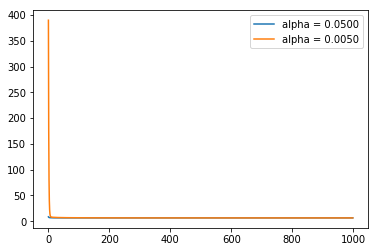

In [29]:
for step in [0.05,0.005]:
    theta_SGD,loss_SGD = stochastic_grad_descent(X_train, y_train, alpha=step, lambda_reg=10**-2, num_epoch=1000)
    plt.plot(range(len(loss_SGD)),loss_SGD.T[X_train.shape[0]-1],label = 'alpha = %0.4f'%step)
#     plt.plot(range(len(loss_SGD)),np.average(loss_SGD.T,axis = 0),label = 'alpha = %0.4f'%step)
    print(loss_SGD)
plt.legend()

Step size decreases:

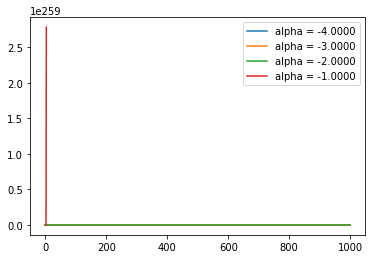

In [20]:
for i in [-4,-3,-2,-1]:
    theta_SGDD,loss_SGDD = stochastic_grad_descent(X_train, y_train, alpha='1/sqrt(t)', lambda_reg=10**-2, num_epoch=1000,c = 10**i)
    plt.plot(range(len(loss_SGDD)),loss_SGDD.T[X_train.shape[0]-1],label = 'alpha = %0.4f'% i) 
plt.legend()